# Material defination
---


- It is used to count material parameters under different definition methods and will be made into a unified py file for easy reference by other codes.  

## Meep Units


[Unit in Meep](https://meep.readthedocs.io/en/master/Introduction/#units-in-meep)
> frequency_in_meep = frequency * a / c  
>> - a = 1 um = 1 * 10 ^ -6   
>> - c = light speed = 3 * 10 ^ 8  

## Using the materials in meep  


[Materials in Meep](https://meep.readthedocs.io/en/master/Materials/#materials)
- 统计不同THz下的波长，公式为 波长=光速/频率 单位（um） 。

| 频率 (THz) | 波长 $\lambda = \frac{c}{f}$ (μm) |
| -------- | ------------------------------- |
| 0.1 THz  | 3000 μm = 3 mm                  |
| 0.5 THz  | 600 μm                          |
| 1 THz    | 300 μm                          |
| 2 THz    | 150 μm                          |
| 3 THz    | 100 μm                          |
| 5 THz    | 60 μm                           |
| 10 THz   | 30 μm                           |
  



### Code

In [ ]:
import meep as mp
from meep.materials import Au,GaAs


Au = Au
GaAs = GaAs

# 用以下方式可以找到meep定义下的材料的介电常数分布的频率范围，也可以用来检查在不同波长处的值
# inspect the frequency range over which the permittivity profile for gold is defined 
# inspect the value of its permittivity tensor at a wavelength of 1.55 µm using the epsilon(frequency) function of the Medium class:
print(Au.valid_freq_range)
Au.epsilon(1/1.55)


## Using the Drude model


### What is Drude Model
- Drude模型是一个经典的物理模型，用于描述金属或导体中自由电子对电场的响应行为，特别是在光电、热电、导电等电磁特性分析中非常重要。
- Drude模型假设：  
> 金属中的自由电子像气体分子一样运动（“自由电子气”模型）。  
> 自由电子在没有外力时随机热运动。  
> 受到电场作用时，电子会获得一个漂移速度。  
> 电子之间不相互作用，但会随机碰撞（比如与晶格离子），碰撞时间用平均松弛时间 τ 描述。  
- 在MIT的文章的第四章有相关的描述，论文可以引用。
- 复介电常数中，real部分代表了电场的相位延迟、折射率（相速度），imaginary部分代表了电磁波在材料中的能量损耗（吸收）。
- 直观来说，real决定了波走多快，imaginary决定了波走多远。

### 核心公式截图  

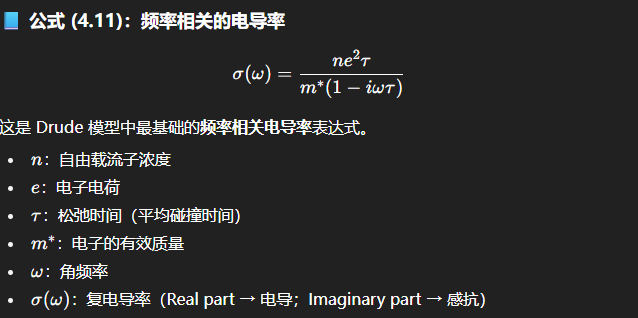

### Code

In [15]:
import meep as mp
import math

light_speed = 3e8
meep_trans = 1e-6

###--------------set up by drude model--------------------###
"""refer to the drude model"""
def cal_omega_p(N,e,epsilon_0,m_star,
                light_speed=3e8,meep_trans=1e-6):
    omega_p = math.sqrt(N * e**2 / (epsilon_0 * m_star))
    omega_p_meep = omega_p * meep_trans / light_speed
    return omega_p_meep

def cal_gamma_meep(gamma,
                   light_speed=3e8,meep_trans=1e-6):
    return gamma * meep_trans / light_speed 

# 1. Calculate the parameter of N=1e18/cm^3
N = 1e24
tao = 1e-13
gamma = 1/tao
me = 9.109e-31
m_star = 0.067 * me
epsilon_0= 8.85e-12
e = 1.6e-19
print('n+ substrate GaAs (N = 1 x 10^18 / cm^3)')
print('     omega = ' + str(cal_omega_p(N=N,e=e,epsilon_0=epsilon_0,m_star=m_star)))
print('     gamma = '+ str(cal_gamma_meep(gamma=gamma)))

# 2. Calculate the parameter of N=5e18/cm^3
N = 5e24
tao = 1e-13
gamma = 1/tao
me = 9.109e-31
m_star = 0.067 * me
epsilon_0= 8.85e-12
e = 1.6e-19
print('GaAs (N = 5 x 10^18 / cm^3)')
print('     omega = ' + str(cal_omega_p(N=N,e=e,epsilon_0=epsilon_0,m_star=m_star)))
print('     gamma = '+ str(cal_gamma_meep(gamma=gamma)))

# 3. Calculate the parameter of N=5e15/cm^3
N = 5e21
tao = 1e-12
gamma = 1/tao
me = 9.109e-31
m_star = 0.067 * me
epsilon_0= 8.85e-12
e = 1.6e-19
print('GaAs (N = 5 x 10^15 / cm^3)')
print('     omega = ' + str(cal_omega_p(N=N,e=e,epsilon_0=epsilon_0,m_star=m_star)))
print('     gamma = '+ str(cal_gamma_meep(gamma=gamma)))

n+ substrate GaAs (N = 1 x 10^18 / cm^3)
     omega = 0.7256953498577653
     gamma = 0.03333333333333333
GaAs (N = 5 x 10^18 / cm^3)
     omega = 1.6227041332374554
     gamma = 0.03333333333333333
GaAs (N = 5 x 10^15 / cm^3)
     omega = 0.05131441029599698
     gamma = 0.0033333333333333335


In [ ]:
import meep as mp

"""Using the formulation formulation given by chatgpt and calculated by python"""
"""This parameter maybe wrong because not transfer into the meep unit"""
Au = mp.Medium(
    epsilon=1.0,
    E_susceptibilities=[
        mp.DrudeSusceptibility(frequency=0.44, gamma=0.033, sigma=1.0)])

# Material in waveguide experiments
## GaAs N = 5e18 cm-3 used in the middle layer between Au and Active Region (n-Si doping)
GaAs_5e18 = mp.Medium(
    epsilon=10.9,
    E_susceptibilities=[
        mp.DrudeSusceptibility(frequency=1.62, 
                               gamma=0.033, 
                               sigma=1.0)])
## GaAs N = 0 or 5e15 cm-3 used in Active Region
GaAs_5e15 = mp.Medium(
    epsilon=12.25,
    E_susceptibilities=[
        mp.DrudeSusceptibility(frequency=0.0513, 
                               gamma=0.0033, 
                               sigma=1.0)])
## substrate GaAs N = 1~2e18 cm-3 used in substrate 
GaAs_1e18 = mp.Medium(
    epsilon=10.9,
    E_susceptibilities=[
        mp.DrudeSusceptibility(frequency=0.7252,   
                               gamma=0.0333,       
                               sigma=1.0)])


In [ ]:
"""refer to the official document,using the meep unit"""
import numpy as np
import meep as mp

def drude_medium(N_cm3, tau_ps, m_eff_ratio, eps_inf)-> mp.Medium:
    # Constants
    e = 1.602e-19
    eps0 = 8.854e-12
    m_e = 9.109e-31
    m_eff = m_eff_ratio * m_e
    a = 1e-6  # um
    c = 3e8
    unit_freq = c / a

    # Convert units
    N_m3 = N_cm3 * 1e6  # from cm^-3 to m^-3
    tau = tau_ps * 1e-12  # from ps to s

    # Plasma frequency: ω_p^2 = Ne^2 / (eps0 * m*)
    omega_p2_SI = N_m3 * e ** 2 / (eps0 * m_eff)  # in rad^2/s^2
    gamma_SI = 1 / tau  # in Hz

    # Convert to Meep units (divide by unit_freq)
    omega_p2_meep = omega_p2_SI / (unit_freq ** 2)
    gamma_meep = gamma_SI / unit_freq

    # Return Meep medium object
    return mp.Medium(epsilon=eps_inf,
                    E_susceptibilities=[mp.DrudeSusceptibility(frequency=0, 
                                                                gamma=gamma_meep, 
                                                                sigma=omega_p2_meep
                                   )])


Au_fun         = drude_medium(N_cm3=5.6e22, tau_ps=1.0,  m_eff_ratio=0.067, eps_inf=1.0 )
GaAs_5e18_fun  = drude_medium(N_cm3=5.0e18, tau_ps=0.1,  m_eff_ratio=0.067, eps_inf=12.9)
GaAs_5e15_fun  = drude_medium(N_cm3=5.0e15, tau_ps=1.0,  m_eff_ratio=0.067, eps_inf=12.9)
GaAs_1e18_fun  = drude_medium(N_cm3=1.0e18, tau_ps=0.1,  m_eff_ratio=0.067, eps_inf=12.9)

## Using the approximated parameter model


### Code

In [ ]:
import meep as mp
"""Using the approximated parameter model"""
# Au
Au_XD = mp.Medium(index=2.21)
## GaAs N = 5e18 cm-3 used in the middle layer between Au and Active Region (n-Si doping)
GaAs_High_XD = mp.Medium(index=4.55)
## GaAs N = 0 or 5e15 cm-3 used in Active Region
GaAs_Act_XD = mp.Medium(index=3.45)


## Other method in the introduction of Meep


### Material Dispersion 材料分散


- How do I import n and k values into Meep?
- Conductivity and Complex ε  
- For example, suppose you want to simulate a medium with **ε = 3.4 + 0.101 i** at a frequency 0.42 (in your Meep units)  
- You only care about the material in a narrow bandwidth around this frequency (i.e. you don't need to simulate the full experimental frequency-dependent permittivity).  
- Then, in Meep, you could use the following python code to identify the material.
~~~python
meep.Medium(epsilon=3.4, D_conductivity=2*math.pi*0.42*0.101/3.4)
~~~

Note:  
- the "conductivity" in Meep is slightly different from the conductivity you might find in a textbook, because for computational convenience it appears as σDD in our Maxwell equations rather than the more-conventional σE
- this just means that our definition is different from the usual electric conductivity by a factor of ε. 
- Also, just as Meep uses the dimensionless relative permittivity for ε, it uses nondimensionalized units of 1/a (where a is your unit of distance) for the conductivities σD,B. 
- If you have the electric conductivity σ in SI units of S/m (S is siemens) and want to convert to σD in Meep units, you can simply use the formula: 
> σD = (a / c) σ / (εr * ε0)  
a : your unit of distance in meters.  
c : vacuum speed of light in m/s.  
ε0 : SI vacuum permittivity.  
εr : real relative permittivity.    
- The quantity a/c in this equation is the conversion factor for frequency in SI units (s−1 or Hz) to frequency in Meep units (c/a).

### Code

In [ ]:
import meep as mp
import math

def transfer_to_meep_frequency(frequency:int)->int:
    um = 1e-6
    c = 3e8 
    frequency_in_meep = frequency * um / c
    return frequency_in_meep

# Electronically tunable aperiodic distributed feedback terahertz lasers
# material in the above artical
# the details are in the Fig 1 part c and d
# c is a standard SI-SP waveguide at 2.85THz and d is same structure after the removal of the metal overlayers
# This material is used to plot the mode intensity
freq_in_meep = transfer_to_meep_frequency(2.85e12)

QCL_neff_c = mp.Medium(epsilon=3.647, D_conductivity=2*math.pi*freq_in_meep*0.007/3.647)
QCL_neff_d = mp.Medium(epsilon=3.308, D_conductivity=2*math.pi*freq_in_meep*0.217/3.308)